# Data Preprocessing Techniques
* Data cleaning
    * Data Imputation
    * Feature Scaling
* Feature transformations
    * Polynomial Features
    * Discretization
    * Handling categorical variables
    * Custom Transformers
    * Composite Transformers
        * Apply composite feature to diverse features
        * TargetTransformRegressor
    * Feature Selection
        * Filter based methods
        * Wrapper based Methods
    * Feature extraction
        * PCA

These transformations are applied in a specific order and the order can be specified via Pipeline. 

## Importing basic libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

## 1.Feature Extraction

### DictVectorizer
 `DictVectorizer` converts a list of dictionary objects to feature matrix

In [8]:
data = [{'age' : 4, 'height' : 96.0},
        {'age' : 1, 'height' : 73.9},
        {'age' : 3, 'height' : 88.9},    
        {'age' : 2, 'height' : 81.6}]

In [9]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed, data_transformed.shape

(array([[ 4. , 96. ],
        [ 1. , 73.9],
        [ 3. , 88.9],
        [ 2. , 81.6]]),
 (4, 2))

## 2. Data Imputation

* Many Ml algos need full feature matrix
* Data Imputation identifies missing values in each features and replaces them with a strategy such as 
    * Mean/Median/mode.
    * user specified constant value.
    
sklearn library provides `sklearn.impute.SimpleImputer` class for this purpose

`add_indicator` is a boolean parameter when set to `True` returns missing value indicators

In [10]:
#Let's get some real world data!!

cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg' , 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None, names=cols)

### **STEP 1:** Check if dataset contains missing values.

In [11]:
heart_data.info() # for numerical values. For str, check unique values etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [12]:
(heart_data.isnull().sum()) #Checking for null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [13]:
print("Unique values in ca: ", heart_data.ca.unique())
print("Unique values in thal: ", heart_data.thal.unique())

Unique values in ca:  ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in thal:  ['6.0' '3.0' '7.0' '?']


`?` missing values. Let's count the missing values.

In [14]:
print("# Missing values in ca:", heart_data.loc[heart_data.ca == '?', 'ca'].count())
print("# Missing values in thal:", heart_data.loc[heart_data.thal == '?', 'thal'].count())

# Missing values in ca: 4
# Missing values in thal: 2


### **STEP 2:** Replace '?' with `nan`

In [15]:
heart_data.replace('?', np.nan, inplace=True)

**STEP 3:** Fill the missing `sklearn` missing value imputation utilities.

Here we use `SimpleImputer` with `mean` strategy.

In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)


(303, 14)


`add_indicator = True:` Adds additional column for each column containing missing values.  

In [17]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', add_indicator=True)
imputer = imputer.fit(heart_data)
heart_data_imputed_with_indicator = imputer.transform(heart_data)
print(heart_data_imputed_with_indicator.shape)

(303, 16)


## 3. Feature Scaling
Feature scaling transforms feature values such that all the features are on the same scale. 
* Enables faster convergence in iterative optimization
* Algos which uses euclidean distance b/n features also suffer
* Tree based ML algos are not affected by feature scaling - So feature scaling not required

Feature scaaling can be performed with the following methods:
* Standardization
* Normalisation
* MaxAbsScaler

Data Set:  [Abalone dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data)

In [22]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header = None, names=cols)

### **STEP 1:** Examine the dataset
Feature scaling performed only on numerical attributes. Let's check which are numerical attributes in the dataset.

In [23]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### **STEP 1a:**  Convert non-numerical attributes to numerical ones

In [24]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [25]:
# Assign numerical values to sex.
abalone_data = abalone_data.replace({"Sex": {"M":1, "F":2, "I":3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


### **STEP 2:** Seperate features from labels


In [26]:
y = abalone_data.pop('Rings')
print("The Dataframe object after deleting label")
abalone_data.info()

The Dataframe object after deleting label
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


## **STEP 3:** Examine feature scales

#### Statistical method

In [27]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


#### Visualisation of feature distributions

* Histograms
* Kernel Density Estimation(KDE) Plot
* Box
* Violin

##### Seperate Histograms

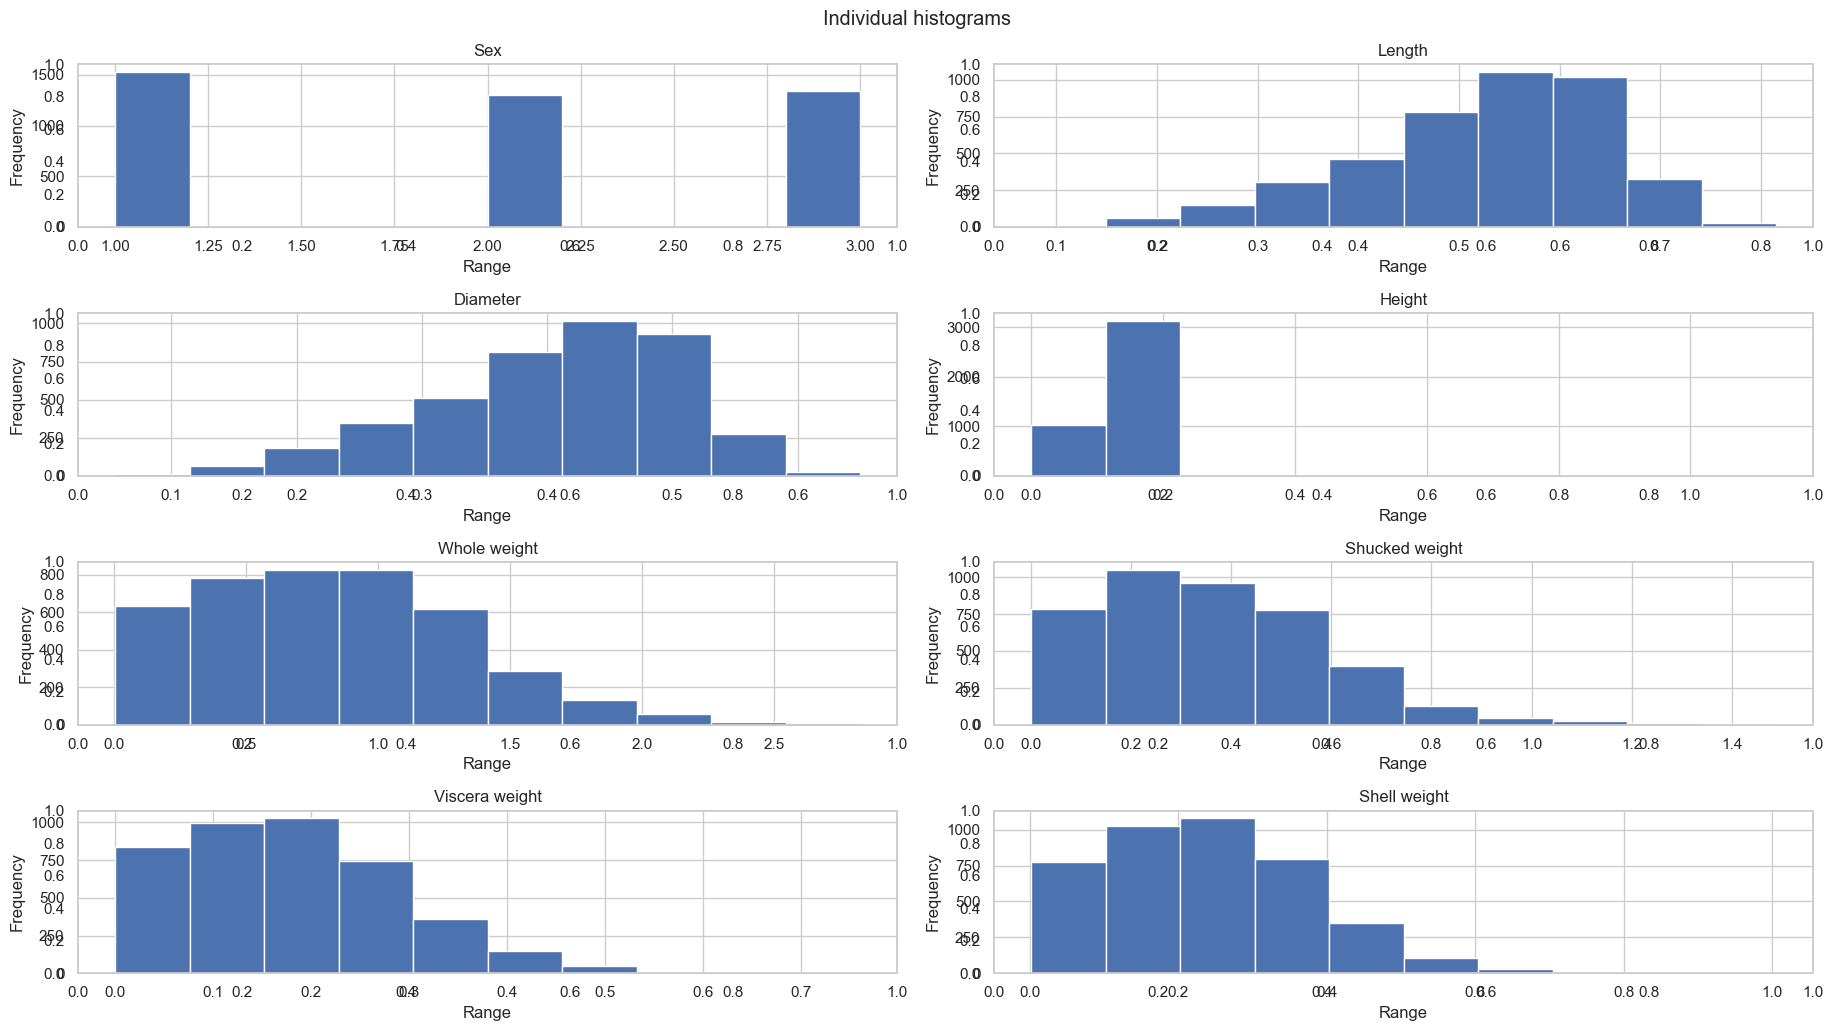

In [28]:
fig, axs = plt.subplots(nrows=4, ncols=2)
fig.suptitle("Individual histograms")
fig.set_size_inches(18.5, 10.5)

for i in range(len(abalone_data.columns)):
    fig.add_subplot(4,2,i+1)
    fig.tight_layout()
    plt.hist(abalone_data[abalone_data.columns[i]])
    plt.title(abalone_data.columns[i])
    plt.xlabel('Range')
    plt.ylabel('Frequency')

##### Histograms together

Text(0, 0.5, 'Frequency')

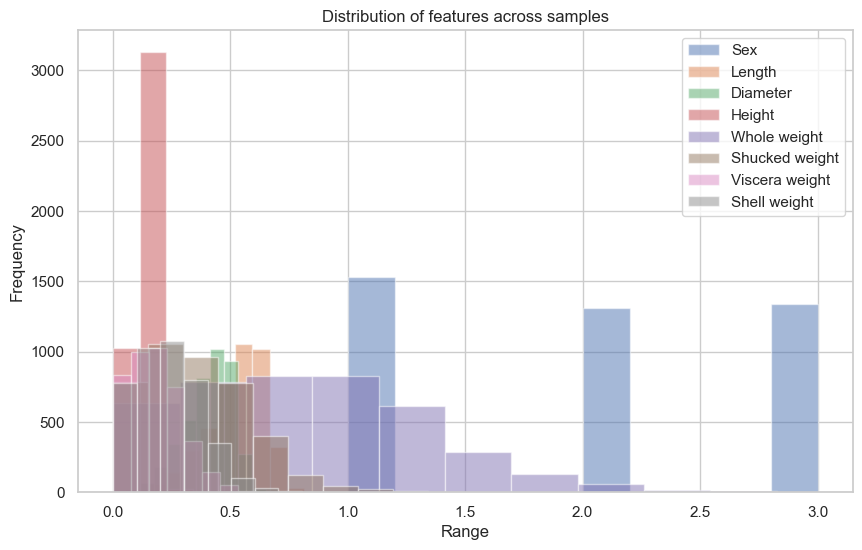

In [29]:
#Histograms collated
fig = plt.figure()
fig.set_size_inches(10, 6)

for feature in abalone_data.columns:
    plt.hist(abalone_data[feature], alpha=0.5, label=feature)

plt.legend()
plt.title('Distribution of features across samples')
plt.xlabel('Range')
plt.ylabel('Frequency')

##### KDE Plot

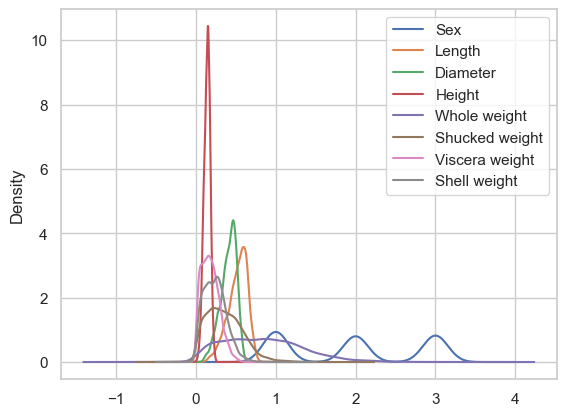

In [30]:
ax = abalone_data.plot.kde()

##### Box Plot

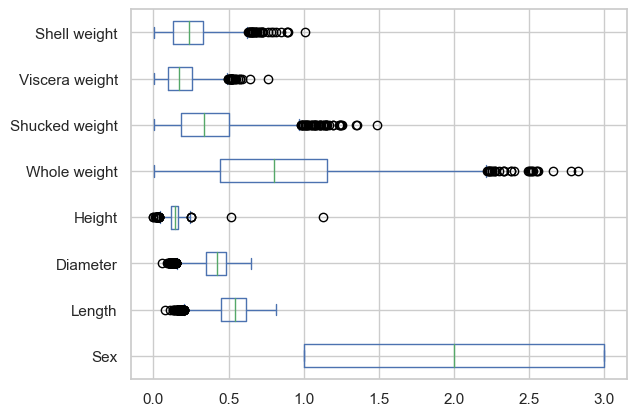

In [31]:
box = abalone_data.plot.box(vert=False)

##### Violin Plot

<AxesSubplot:>

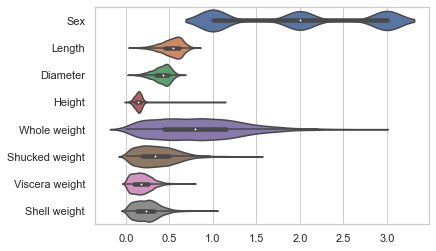

In [22]:
sns.set(style = 'whitegrid')
sns.violinplot(data=abalone_data, orient="h", scale="width")

## **STEP 4:** Scaling

* Normalisation
    * `MaxAbsoluteScaler` transaforms features into range [-1,1]
        * x' = x/MaxAbsoluteValue 
        * MaxAbsoluteValue = max(x.max, |x.min|)
    * `MinMaxScaler` transforms feature in range [0,1]
        * x_new = (x_old - x_min)/(x_max - x_min)

* Standardisation
    * `StandardScaler`
    * X_new = (X_old - mu)/sigma

In [32]:
x = np.array([4, 2, 5, -2, -100]).reshape(-1, 1)
print(x)

[[   4]
 [   2]
 [   5]
 [  -2]
 [-100]]


In [33]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
print(x_new)

[[ 0.04]
 [ 0.02]
 [ 0.05]
 [-0.02]
 [-1.  ]]


In [34]:
from sklearn.preprocessing import MinMaxScaler
X = abalone_data
mm = MinMaxScaler()
X_normalised = mm.fit_transform(X)
X_normalised[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

In [35]:
X_normalised.mean(axis=0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

In [36]:
X_normalised.std(axis=0)

array([0.4138578 , 0.16226829, 0.16676972, 0.03701066, 0.17366046,
       0.14925109, 0.14430695, 0.13870055])

#### Histogram of transformed features

Text(0, 0.5, 'Frequency')

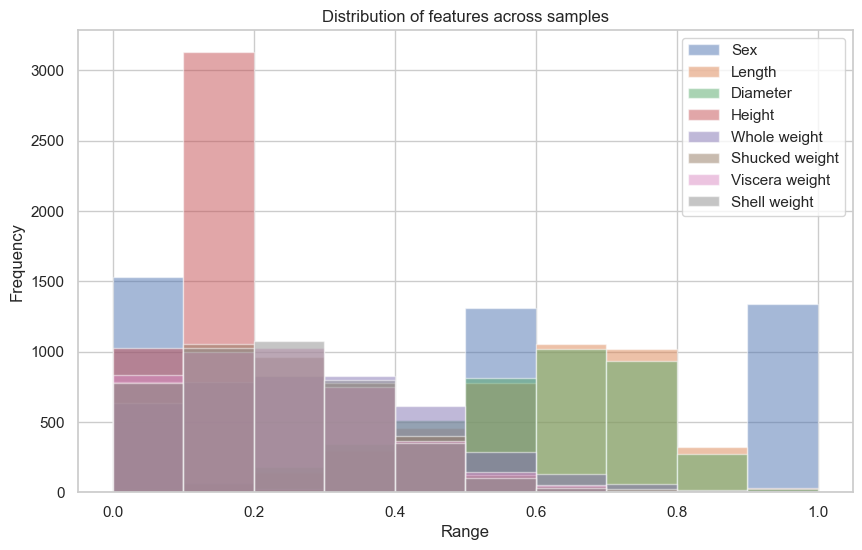

In [37]:
fig = plt.figure()
fig.set_size_inches(10, 6)
cols = abalone_data.columns
df = pd.DataFrame(X_normalised, columns=cols)

for feature in df.columns:
    plt.hist(df[feature], alpha=0.5, label=feature)

plt.legend()
plt.title('Distribution of features across samples')
plt.xlabel('Range')
plt.ylabel('Frequency')

#### Box Plot of transformed features

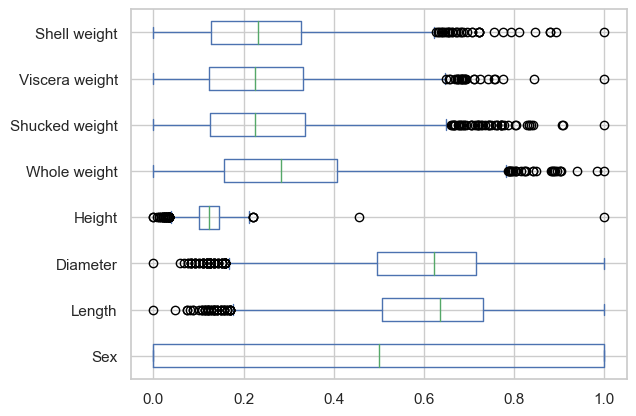

In [38]:
box = df.plot.box(vert=False)

##### Violin Plot of tranformed features

<AxesSubplot:>

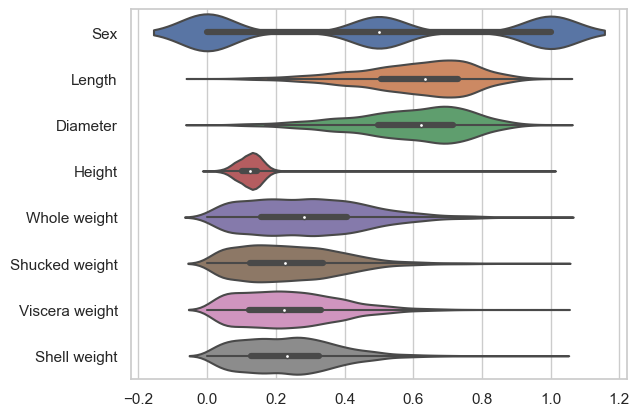

In [39]:
sns.set(style = 'whitegrid')
sns.violinplot(data= df, orient="h", scale="width")

##### KDE Plot of transformed features

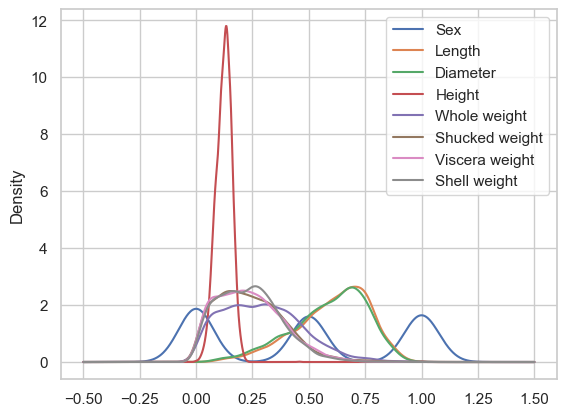

In [40]:
ax = df.plot.kde()

### Standardisation

In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_standardised = ss.fit_transform(X)
X_standardised.mean(axis=0), X_standardised.std(axis=0)

(array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
         9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1.]))

#### Histogram of standardised features

Text(0, 0.5, 'Frequency')

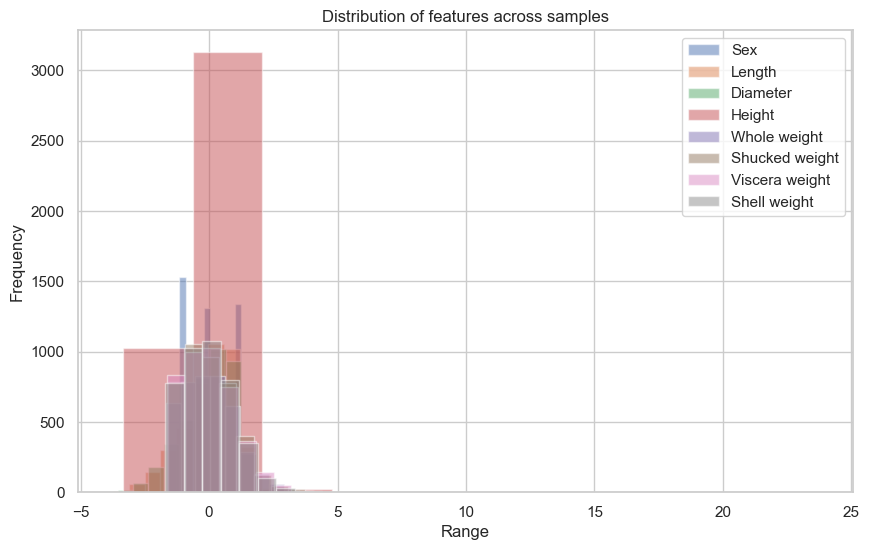

In [42]:
fig = plt.figure()
fig.set_size_inches(10, 6)
cols = abalone_data.columns
df = pd.DataFrame(X_standardised, columns=cols)

for feature in df.columns:
    plt.hist(df[feature], alpha=0.5, label=feature)

plt.legend()
plt.title('Distribution of features across samples')
plt.xlabel('Range')
plt.ylabel('Frequency')

#### Box Plot of standardised features

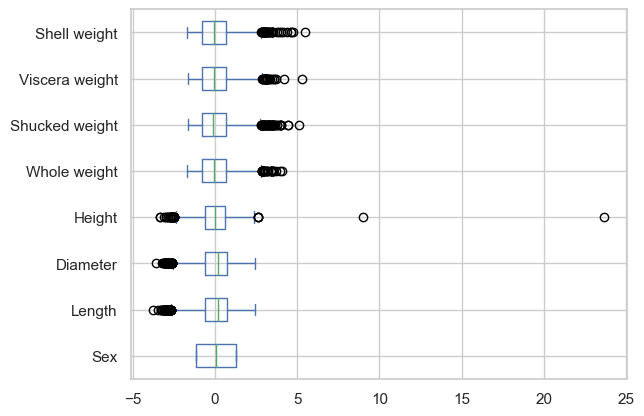

In [43]:
box = df.plot.box(vert=False)

##### Violin Plot of standardised features

<AxesSubplot:>

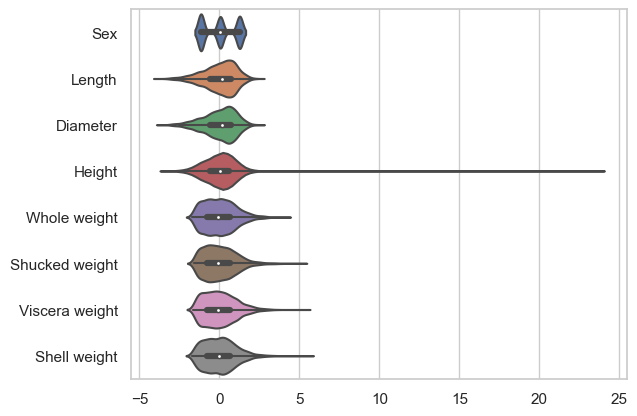

In [44]:
sns.set(style = 'whitegrid')
sns.violinplot(data= df, orient="h", scale="width")

##### KDE Plot of standardised features

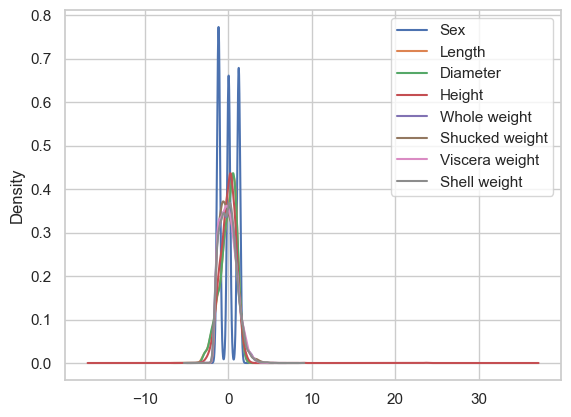

In [45]:
ax = df.plot.kde()

## 4. `add_dummy_feature`
Augments dataset with a column vector of ones

In [46]:
x = np.array(
        [[7,1],
        [1, 8],
        [2, 0],
        [9, 6]])

from sklearn.preprocessing import add_dummy_feature

x_new = add_dummy_feature(x)
print(x_new)

[[1. 7. 1.]
 [1. 1. 8.]
 [1. 2. 0.]
 [1. 9. 6.]]


## 5. Custom transformers

Enables conversion of an existing Python function into a transformer to assist in data cleaning or preprocessing

Useful when:
1. Dataset consists of heterogenous datatypes
2. When different columns require different transformations
3. We need stateless transformations such as taking the log of frequencies, custom scaling etc 


Dataset: [Wine Quality dataset from UCI ML repository](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

In [47]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";") 
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Let's use `np.log1p` which returns natural logarithm of (1 + the feature Value)

In [48]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
wine_data_transformed = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformed, columns=wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


## 6. Polynomial Features

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree

* `sklearn.preprocessing.PolynomialFeatures`

In [49]:
from sklearn.preprocessing import PolynomialFeatures
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";") 
wine_data_copy = wine_data.copy()
wine_data = wine_data.drop(['quality'], axis=1)
print ('Number of features before transformation = ', wine_data.shape)

#Let's apply a polynomial transform of the order 2 to wine_data
poly = PolynomialFeatures(degree=2)
poly_wine_data = poly.fit_transform(wine_data)
print("Number of features after transformation= ", poly_wine_data.shape)

Number of features before transformation =  (1599, 11)
Number of features after transformation=  (1599, 78)


In [50]:
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

## 7. Discretization

Discretization/quantization/binning provides a way to partition continuos features into discrete values.

* Certain dataasets with continuous features may benefit from discretisation, because it transforms continous attibutes to nominal attributes.
* One-hot encoded discretised freatues can make a model more expressive, while maintaing interpretability.
* For instance, pre-processing witha discretizer can introduce non-linearity to linear models.

In [51]:
#KBinsDiscretizer discretizes features into k bins
from sklearn.preprocessing import KBinsDiscretizer

wine_data = wine_data_copy.copy()

#Traansform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode="onehot")
X = np.array(wine_data['chlorides']). reshape(-1,1)
X_binned = enc.fit_transform(X)
X_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [52]:
X_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

## 8. Handling Categorical Features

The following methods can be used to convert the categorical features into numeric features

1. Ordinal encoding
2. One-hot encoding
3. Label encoding
4. Using dummy variable


### Ordinal encoding
Assigns unique numerical value to each unique non-numerical feature. But it would introduce numerical relationship which may or may not exist between the non-numerical entities
* Implemented using `OrdinalEncoder` class from `sklearn.preprocessing` module

### One-hot encoding
This approach consists of creating an additional feature for each label present in the categorical feature and putting 1 or 0 for these new features depending on the categorical feature's value.
* Implemented using `OneHotEncoder` class from `sklearn.preprocessing` module

Dataset: [Iris]()

In [53]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None, names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


The `label` is a categorical attribite

In [54]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Let's convert them to One-hot vectors

In [55]:
onehotencoder = OneHotEncoder(categories='auto')
print(" Shape of y before encoding", iris_data.label.shape)

'''
Passing 1d arraysas data to onehotencoder is deprecated.
Hence reshape to (-1,1) to have two dimensions
Input of OneHotEncoder fit_transform must not be one dimensional array
'''
iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1, 1))

print('Shape of y after encoding = ',iris_labels.shape)

print("First five labels:")
print(iris_labels.toarray()[:5])

 Shape of y before encoding (150,)
Shape of y after encoding =  (150, 3)
First five labels:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Let us observe the difference between one hot encoding and ordinal encoding

In [56]:
enc = OrdinalEncoder()
iris_labels = np.array(iris_data['label'])

iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1, 1))
print("Unique labels: ", np.unique(iris_labels_transformed))

print("\nFirst 5 labels:")
print(iris_labels_transformed[:5])

Unique labels:  [0. 1. 2.]

First 5 labels:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### LabelEncoder

Another option is to use `LabelEncoder` for transforming categorical features into integer codes

In [57]:
from sklearn.preprocessing import LabelEncoder

iris_labels = np.array(iris_data['label'])

enc = LabelEncoder()
label_integer = enc.fit_transform(iris_labels)
label_integer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### MultilabelBinarizer

Encodes categorical featurees with value between $0$ and $k-1$, where $k$ is number of classes

In [58]:
movie_genres = [{'action', 'comedy'},
                {'comedy'},
                {'action', 'thriller'},
                {'science-fiction', 'action', 'thriller'} ]
                

In [59]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(movie_genres)

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

### Using dummy variables

In [60]:
# use get_dummies to create a one_hot encoding for each unique categorical value in the 'class column
# convert categorical classs variable to one hot encoding:
iris_data_onehot = pd.get_dummies(iris_data, columns=['label'], prefix=['one_hot'])
iris_data_onehot

,sepal length,sepal width,petal length,petal width,one_hot_Iris-setosa,one_hot_Iris-versicolor,one_hot_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## 9. Composite Transformers

### ColumnTransformer

It applies a set of transdformers to columns of an array or `pandas.DataFrame`, concactenates the transformed outputs from different transformers into a single matrix.
* It is useful for transforming heterogenous data by applying different transformers to seperate subset of features
* It combines different feature selcetion mechanisms and transformations into a single transformer object.

In [61]:
x = [
    [20.0, 'male',],
    [11.2, 'female',],
    [15.6, 'female',],
    [13.0, 'male',],
    [18.6, 'male',],
    [16.4, 'female',],
]

x = np.array(x)

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

ct = ColumnTransformer([('scaler', MaxAbsScaler(), [0]),
                        ('pass', 'passthrough', [0]),
                        ('encoder', OneHotEncoder(), [1])])
ct.fit_transform(x)

array([['1.0', '20.0', '0.0', '1.0'],
       ['0.5599999999999999', '11.2', '1.0', '0.0'],
       ['0.78', '15.6', '1.0', '0.0'],
       ['0.65', '13.0', '0.0', '1.0'],
       ['0.93', '18.6', '0.0', '1.0'],
       ['0.82', '16.4', '1.0', '0.0']], dtype='<U32')

### TransformedTargetRegressor

Transforms the target variable y before fitting a regression model.
* The predicted values are mapped back to the original space via an inverse transform.
* It takes regressor and transformer to be applied to the taret as arguments.

In [62]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn. model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True)
X, y = X[:2000,:], y[:2000] #select a subset of data

transformer = MaxAbsScaler()

regressor = LinearRegression()

regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regr.fit(X_train, y_train)

print("R2 score of transformed label regression: {0:.2f}".format(regr.score(X_test, y_test)))

raw_target_regr = LinearRegression().fit(X_train, y_train)
print("R2 score of raw label regression: {0:.2f}".format(raw_target_regr.score(X_test, y_test)))

R2 score of transformed label regression: 0.59
R2 score of raw label regression: 0.59


## 10. Feature Selection

`sklearn.feature_selction` 

### Filter based methods

#### VarianceThreshold

This transformer helps to keep only high variance features by providing a certain threshold.


In [65]:
data = [{'age': 4, 'height': 96.0},
        {'age': 1, 'height': 73.9},
        {'age': 3, 'height': 88.9},
        {'age': 2, 'height': 81.6}]

dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
np.var(data_transformed, axis = 0)

array([ 1.25 , 67.735])

In [66]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=9)
data_new = vt.fit_transform(data_transformed)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

#### SelectKBest
It selects $k$ highest scoring features based on a function and removes the rest of the features.

Dataset: [California Housing]()

In [71]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

#Download data
X_cal, y_cal = fetch_california_housing(return_X_y=True)

#Select a subset of data

X, y = X_cal[:2000,:], y_cal[:2000]

print(f'Shape of feature matrix before feature selection:{X.shape}')

Shape of feature matrix before feature selection:(2000, 8)


Let's select 3 most important features, we can use only `mutual_info_regression` or `f_regression` functions only

In [72]:
skb = SelectKBest(mutual_info_regression, k = 3)
X_new = skb.fit_transform(X, y)

print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


In [73]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

#### SelectPercentile

This is very similar to `SelectKBest`, the only difference being that it select upto the top `percentile`of all features abd drops the rezt of the features. Uses a a Scoring function like `SelectKBest` as well. 

In [74]:
from sklearn. feature_selection import SelectPercentile
sp = SelectPercentile(mutual_info_regression, percentile = 30)
X_new = sp.fit_transform(X, y)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


In [75]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

#### GenericUnivariateSelect

It applies univariate feature selection with a strategy, which is passed to the API via `mode` parameter. `mode` can take the following values: `percentile`, `k_best`, `fpr`(false positive ratio), `fdr`(false discovery ratio), `fwe`(family wise error rate). To obtain the same result as `SelectKBest`,

In [76]:
from sklearn.feature_selection import GenericUnivariateSelect
gus = GenericUnivariateSelect(mutual_info_regression, mode = 'k_best', param = 3)
X_new = gus.fit_transform(X, y)
print(f'Shape of feature matrix before feature selection:{X.shape}')
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix before feature selection:(2000, 8)
Shape of feature matrix after feature selection:(2000, 3)


### Wrapper based Methods

#### RFE(Recursive Feature Elimination)
**STEP 1** : Fits a model.

**STEP 2** : Ranks the features, afterwards it removes one or more features dependent on `step` parameter.

**STEP 3** : Repeat till we reach the desired number of features

In [77]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X, y)

#support_ attribute is a boolean array
#marking which features are selected
print(selector.support_)

#rank of each feature
#if it's value is '1', Then it is selected
#features with rank 2 and onwards are ranked least.
print(f'Rank of each feature is: {selector.ranking_}')


[ True False False False False False  True  True]
Rank of each feature is: [1 5 4 3 6 2 1 1]


In [64]:
X_new = selector.transform(X)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')

Shape of feature matrix after feature selection:(2000, 3)


#### SelectFromModel

Select desired number of important features above certain threshold of feature importance as obtained from the trained estimator.

* The feature importance is obtained via `coef_`, `feature_importances` or an `importance_getter` callable from the trained estimator
* The feature importance threshold can be specified either numerically or through string argument based on built in heuristic such as `mean`, `median` and float multiples of these like `0.1*mean`

In [65]:
from sklearn.feature_selection import SelectFromModel

estimator = LinearRegression()
estimator.fit(X, y)

print(f'Coefficients of features: {estimator.coef_}')
print(f'Indices of top {3} features: {np.argsort(estimator.coef_)[-3:]}')

t = np.argsort(np.abs(estimator.coef_))[-3:]
model = SelectFromModel(estimator, max_features=3, prefit=True)
X_new = model.transform(X)
print(f'Shape of feature matrix after feature selection:{X_new.shape}')


Coefficients of features: [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]
Indices of top 3 features: [1 2 0]
Shape of feature matrix after feature selection:(2000, 3)


#### SequentialFeatureSelector

It performs feature selection by selecting or deselecting features one by one in a greedy manner

In [66]:
from sklearn.feature_selection import SequentialFeatureSelector

In [67]:
%%time

estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
sfs.fit_transform(X, y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: total: 172 ms
Wall time: 171 ms


The features corresponding to `True` in the output `sfs.get_support()` are seleccted. 

In [68]:
%%time

estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction='backward')
sfs.fit_transform(X, y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: total: 234 ms
Wall time: 235 ms


In [69]:
%%time

estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction='forward')
sfs.fit_transform(X, y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: total: 156 ms
Wall time: 154 ms


## 11. PCA

In [78]:
from sklearn.decomposition import PCA
pca  = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

## 12. Chaining Transformers

The preprocessing transformations are applied one after the another on the input feature matrix. It is important to apply exactly the same transformation on training, evaluation and testing sets in the same order. 

The `sklearn.pipeline` module provides utilities to build a compsite estimator, as a chain of transformers and estimators.

### Pipeline

Sequencially apply a list if transformers and estimators.
* Intermediate steps of the pipeline must be 'transformers'. i.e. They must implement `fit` and `transform` methods.
* Final estimator only needs to implement `fit`

The purpose of the pipeline is to assemble several steps that can be cross-validated together whilesetting different parameters

### Pipeline
A Pipeline can be created with Pipeline(). It takes a list of `('estimatorName', estimator(..))` tuples. The pipeline object exposes the interrface of the last step.

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

estimators = [
    ('simpleImputer', SimpleImputer()),
    ('standardscaler', StandardScaler())
]

pipe = Pipeline(steps=estimators)

The same pipeline can als be created via `make_pipeline()` helper function, which doesn't take names of the steps and assigns them generic names based on their steps.

In [71]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(SimpleImputer(), 
                     StandardScaler())

Accessing Individual steps in a pipeline

In [72]:
from sklearn.decomposition import PCA

estimators = [
            ('simpleImputer', SimpleImputer()),
            ('pca', PCA()),
            ('regressor', LinearRegression())
]

pipe = Pipeline(steps=estimators)

In [73]:
# Let's print number of steps in this pipeline
print(len(pipe.steps))

3


In [74]:
#Let's look at each step
print(pipe.steps)

[('simpleImputer', SimpleImputer()), ('pca', PCA()), ('regressor', LinearRegression())]


In [75]:
#Accessing parameters of a step

pipe.set_params(pca__n_components = 2)

Pipeline(steps=[('simpleImputer', SimpleImputer()),
                ('pca', PCA(n_components=2)),
                ('regressor', LinearRegression())])

### GridSearch with pipeline

By using naming convention of nested parameters, grid search can be implemented.

In [76]:
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = dict(imputer = ['passthrough',
                             SimpleImputer(),
                             KNNImputer()],
                    clf = [SVC(), LogisticRegression()],
                    clf__C = [0.1, 10, 100])

grid_search = GridSearchCV(pipe, param_grid=param_grid)

* `c` is an inverse of regularization, lower its value stronger the regularisation is.
* In the example above `clf__C provides a set of values for grid search

### Caching Transformers

Transforming data is a computationally expensive step.

* For grid search, transformers need not be applied for every parameter configuration. they can be applied once, and the transformed data can be reused.

This can be achieved by setting `memory` parameter of a `pipeline` object.

In [77]:
import tempfile
tempDirPath = tempfile.TemporaryDirectory()

In [78]:
estimators = [ 
                ('simpleImputer', SimpleImputer()),
                ('pca', PCA(2)),
                ('regressor', LinearRegression())
]

pipe = Pipeline(steps=estimators, memory=tempDirPath)

### FeatureUnion

Concatenates results of multiple traansformer objects.

* Applies a list of transformer objects in parallel, and their outputs are concatenated side by side into a largematrix.

`FeatureUnion` and `Pipeline` can be used to create complex transformers.

## 13. Visualising Pipelines

In [79]:
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([('selector', ColumnTransformer([('select_first_4',
                                                            'passthrough',
                                                            slice(0,4))])),
                            ('imputer', SimpleImputer(strategy='median')),
                            ('std_scaler', StandardScaler()),
                            ])

cat_pipeline = ColumnTransformer([('label_binarizer', LabelBinarizer(), [4]),
                                    ])

full_pipeline = FeatureUnion(transformer_list=
                            [("num_pipeline", num_pipeline),
                                ("cat_pipeline", cat_pipeline),
                            ]) 


In [80]:
from sklearn import set_config
set_config(display='diagram')

#displays HTML representation in a jupyter context
full_pipeline

FeatureUnion(transformer_list=[('num_pipeline',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select_first_4',
                                                                                  'passthrough',
                                                                                  slice(0, 4, None))])),
                                                ('imputer',
                                                 SimpleImputer(strategy='median')),
                                                ('std_scaler',
                                                 StandardScaler())])),
                               ('cat_pipeline',
                                ColumnTransformer(transformers=[('label_binarizer',
                                                                 LabelBinarizer(),
                                                                 [4])]))])

## 14. Handling impalanced data

There are two main approached to handle imbalanced data:
* Undersampling
* Oversampling

Dataset: [Wine Quality dataset from UCI ML repository](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

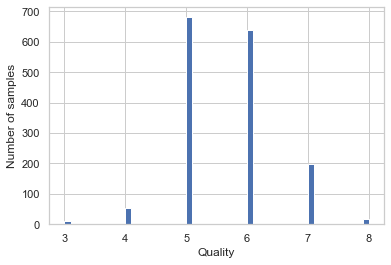

In [81]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

wine_data['quality'].hist(bins=50)
plt.xlabel('Quality')
plt.ylabel('Number of samples')
plt.show()

In [82]:
wine_data.shape

(1599, 12)

### Undersampling

In [83]:
from imblearn.under_sampling import RandomUnderSampler

In [84]:
# class count
class_count_3, class_count_4, class_count_5, class_count_6, class_count_7, class_count_8 = wine_data['quality'].value_counts()

#seperate class

class_3 = wine_data[wine_data['quality'] == 3]
class_4 = wine_data[wine_data['quality'] == 4]
class_5 = wine_data[wine_data['quality'] == 5]
class_6 = wine_data[wine_data['quality'] == 6]
class_7 = wine_data[wine_data['quality'] == 7]
class_8 = wine_data[wine_data['quality'] == 8]

# Print the shape of the class
print('class 3:', class_3.shape)
print('class 4:', class_4.shape)
print('class 5:', class_5.shape)
print('class 6:', class_6.shape)
print('class 7:', class_7.shape)
print('class 8:', class_8.shape)

class 3: (10, 12)
class 4: (53, 12)
class 5: (681, 12)
class 6: (638, 12)
class 7: (199, 12)
class 8: (18, 12)


In [85]:
from collections import Counter

X = wine_data.drop(['quality'], axis=1)
y = wine_data['quality']

undersample = RandomUnderSampler(random_state = 0)
X_rus, y_rus = undersample.fit_resample(X, y)

print('Original dataset shape: ', Counter(y))
print('Original dataset shape: ', Counter(y_rus))

Original dataset shape:  Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Original dataset shape:  Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


### Oversampling

In [86]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape: ', Counter(y))
print('Resample data shape: ', Counter(y_ros))

Original dataset shape:  Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Resample data shape:  Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


In [87]:
print(X_ros.shape[0] - X.shape[0], 'New random points generated with RandomOverSampler')

2487 New random points generated with RandomOverSampler


### Oversampling using SMOTE

SMOTE(Synthetic Minor Oversampling Technique) is a popular technique for oversampling.

In [88]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)
counter = Counter(y_sm)
counter

Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})

**Types of SMOTE**

* Borderline SMOTE
* Borderline-SMOTE SVM
* Adaptive Synthetic Sampling(ADASYN)